# Data Visualisation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## removing passengerid as it's correlation to survived

In [7]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(df['Sex'])
df['Sex']=labelencoder.transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.pop('Name')
df.pop('Cabin')
df.pop('PassengerId')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df.pop('Ticket')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [11]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [12]:
df=df.dropna()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
Y = df['Survived']
df.pop('Survived')
df.pop('Embarked')
X = df
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [15]:
Scaler =StandardScaler()

In [16]:
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)


Evaluting function

In [17]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))

## further Feature Selection

## using decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
d_clf = DecisionTreeClassifier(min_samples_split= 20, max_depth=6)
d_clf.fit(X_train, Y_train)
result = pd.DataFrame(d_clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Sex,0.529924
Pclass,0.218168
Age,0.117590
Fare,0.116899
Parch,0.017419
SibSp,0.000000


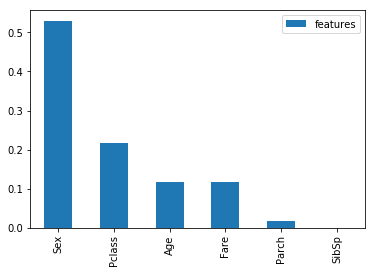

In [20]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [21]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes':list(range(2,20)),
          'max_depth':list(range(4,20)),
          'min_samples_leaf':list(range(1,20))} 
grid_search_cv = GridSearchCV(d_clf, params, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 5472 candidates, totalling 16416 fits


[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 12872 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 16416 out of 16416 | elapsed:   12.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=13,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
d_clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=13,max_leaf_nodes=8)
d_clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=13,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
print_score(d_clf, X_train, X_test, Y_train, Y_test, train=True)
print_score(d_clf, X_train, X_test, Y_train, Y_test, train=False)

Train Result : 

Accuracy Score 0.8243

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.95      0.87       344
          1       0.90      0.63      0.74       225

avg / total       0.84      0.82      0.82       569
 

Confusion Metrics : 
 [[328  16]
 [ 84 141]] 

Average Accuracy : 0.7580

Accuracy SD : 0.0576

Test Result : 

Accuracy Score 0.7552

Classification Report : 
              precision    recall  f1-score   support

          0       0.73      0.89      0.80        80
          1       0.80      0.59      0.68        63

avg / total       0.76      0.76      0.75       143


Confusion Metrics : 
 [[71  9]
 [26 37]] 



### uding Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
result = pd.DataFrame(rf_clf.feature_importances_, X.columns)
result.columns = ['features']
result.sort_values(by='features', ascending=False)

,features
Fare,0.297763
Sex,0.275549
Age,0.269215
Pclass,0.078560
SibSp,0.041332
Parch,0.037582


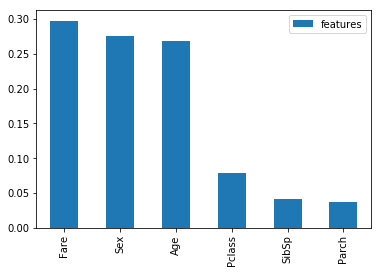

In [29]:
result.sort_values(by='features', ascending=False).plot(kind='bar');

In [30]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes':list(range(2,20)),
          'max_depth':list(range(4,20)),
          'min_samples_leaf':list(range(1,20))} 
grid_search_cv = GridSearchCV(rf_clf, params, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 5472 candidates, totalling 16416 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3480 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 6280 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 9880 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 14280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 16416 out of 16416 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [34]:
grid_search_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
grid_clf = RandomForestClassifier(max_depth=5,min_samples_leaf=2,max_leaf_nodes=17)
grid_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
print_score(grid_clf, X_train, X_test, Y_train, Y_test, train=True)
print_score(grid_clf, X_train, X_test, Y_train, Y_test, train=False)

Train Result : 

Accuracy Score 0.8612

Classification Report : 
              precision    recall  f1-score   support

          0       0.85      0.94      0.89       344
          1       0.89      0.74      0.81       225

avg / total       0.86      0.86      0.86       569
 

Confusion Metrics : 
 [[324  20]
 [ 59 166]] 

Average Accuracy : 0.7964

Accuracy SD : 0.0425

Test Result : 

Accuracy Score 0.7762

Classification Report : 
              precision    recall  f1-score   support

          0       0.77      0.85      0.81        80
          1       0.78      0.68      0.73        63

avg / total       0.78      0.78      0.77       143


Confusion Metrics : 
 [[68 12]
 [20 43]] 



## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
l_clf = LogisticRegression()

In [38]:
l_clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
params = {'max_iter':list(range(1,200,10)),
          'tol':[0.1, 0.001, 0.01, 0.0001]} 
grid_search_cv = GridSearchCV(l_clf, params, n_jobs=1, verbose=0)
grid_search_cv.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191], 'tol': [0.1, 0.001, 0.01, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
grid_search_cv.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=11, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

In [41]:
grd_l_clf=LogisticRegression(max_iter=11,tol=0.001)
grd_l_clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=11, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

In [42]:
print_score(grd_l_clf, X_train, X_test, Y_train, Y_test, train=True)
print_score(grd_l_clf, X_train, X_test, Y_train, Y_test, train=False)

Train Result : 

Accuracy Score 0.8155

Classification Report : 
              precision    recall  f1-score   support

          0       0.83      0.87      0.85       344
          1       0.78      0.74      0.76       225

avg / total       0.81      0.82      0.81       569
 

Confusion Metrics : 
 [[298  46]
 [ 59 166]] 

Average Accuracy : 0.8035

Accuracy SD : 0.0627

Test Result : 

Accuracy Score 0.7902

Classification Report : 
              precision    recall  f1-score   support

          0       0.76      0.91      0.83        80
          1       0.85      0.63      0.73        63

avg / total       0.80      0.79      0.78       143


Confusion Metrics : 
 [[73  7]
 [23 40]] 



## USING SVM

In [43]:
from sklearn.svm import SVC
Svc_clf = SVC(C = 1.7, kernel='rbf', degree=3)
Svc_clf.fit(X_train, Y_train)

SVC(C=1.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
print_score(Svc_clf, X_train, X_test, Y_train, Y_test, train=True)
print_score(Svc_clf, X_train, X_test, Y_train, Y_test, train=False)

Train Result : 

Accuracy Score 0.8418

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.97      0.88       344
          1       0.94      0.64      0.76       225

avg / total       0.86      0.84      0.83       569
 

Confusion Metrics : 
 [[334  10]
 [ 80 145]] 

Average Accuracy : 0.7997

Accuracy SD : 0.0430

Test Result : 

Accuracy Score 0.8042

Classification Report : 
              precision    recall  f1-score   support

          0       0.78      0.91      0.84        80
          1       0.86      0.67      0.75        63

avg / total       0.81      0.80      0.80       143


Confusion Metrics : 
 [[73  7]
 [21 42]] 



### Using Ensempble

In [46]:
from  sklearn.ensemble  import BaggingClassifier

In [48]:
clf = BaggingClassifier(n_estimators=1000, base_estimator=SVC(C = 1.7, kernel='rbf', degree=3))

In [50]:
clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=SVC(C=1.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [53]:
print_score(clf, X_train, X_test, Y_train, Y_test, train=True)
print_score(clf, X_train, X_test, Y_train, Y_test, train=False)

Train Result : 

Accuracy Score 0.8453

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.97      0.88       344
          1       0.93      0.66      0.77       225

avg / total       0.86      0.85      0.84       569
 

Confusion Metrics : 
 [[332  12]
 [ 76 149]] 

Average Accuracy : 0.7998

Accuracy SD : 0.0440

Test Result : 

Accuracy Score 0.8112

Classification Report : 
              precision    recall  f1-score   support

          0       0.79      0.90      0.84        80
          1       0.85      0.70      0.77        63

avg / total       0.82      0.81      0.81       143


Confusion Metrics : 
 [[72  8]
 [19 44]] 



In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
clf = AdaBoostClassifier(n_estimators=250)

In [56]:
clf.fit(X_train, Y_train)

NameError: name 'y_train' is not defined